In [1]:
#Required Library imports. Pandas is used to analyse
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization tools
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import folium
from folium.plugins import HeatMap
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# **The data set from mentioned data Source is used. Here we are trying to analyse the crime statistics of London city during the month of March 2018 and Feb 2021.**

In [3]:
data_2018 = pd.read_csv("../input/police/2018.csv") # the iris dataset is now a Pandas DataFrame
data_2021 = pd.read_csv("../input/police/2021.csv")

# Both data sets are displayed.****

In [4]:
data_2018.sample()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
527,4dc194c73d9a77823204dca71664f8c075883b024ec534...,2018-03,City of London Police,City of London Police,-0.101274,51.512791,On or near St Andrew'S Hill,E01032739,City of London 001F,Violence and sexual offences,Unable to prosecute suspect,NaN


In [5]:
data_2021.sample()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
196,cf4044671d31fba71f43b22b9b29a39100a92dc53cf329...,2021-02,City of London Police,City of London Police,-0.104281,51.516032,On or near Bear Alley,E01032740,City of London 001G,Theft from the person,Under investigation,NaN


Check for Null values in both data frames

In [6]:
data_2018.isnull().sum()

Crime ID                 133
Month                      0
Reported by                0
Falls within               0
Longitude                 41
Latitude                  41
Location                   0
LSOA code                 41
LSOA name                 41
Crime type                 0
Last outcome category    133
Context                  707
dtype: int64

In [8]:
data_2021.isnull().sum()

Crime ID                  67
Month                      0
Reported by                0
Falls within               0
Longitude                 31
Latitude                  31
Location                   0
LSOA code                 31
LSOA name                 31
Crime type                 0
Last outcome category     67
Context                  250
dtype: int64

# **Visualise the null value ration in both the files**

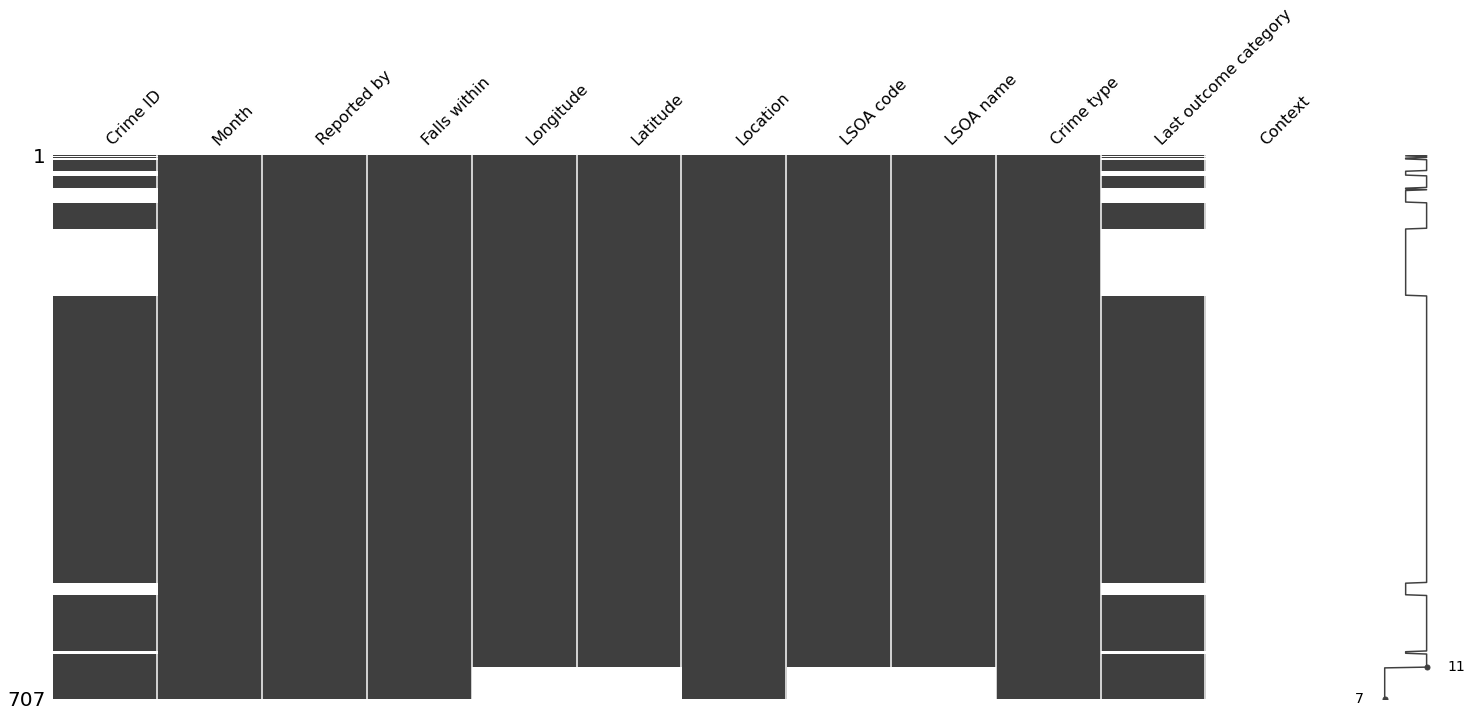

In [9]:
import missingno as msno
msno.matrix(data_2018)
plt.show()

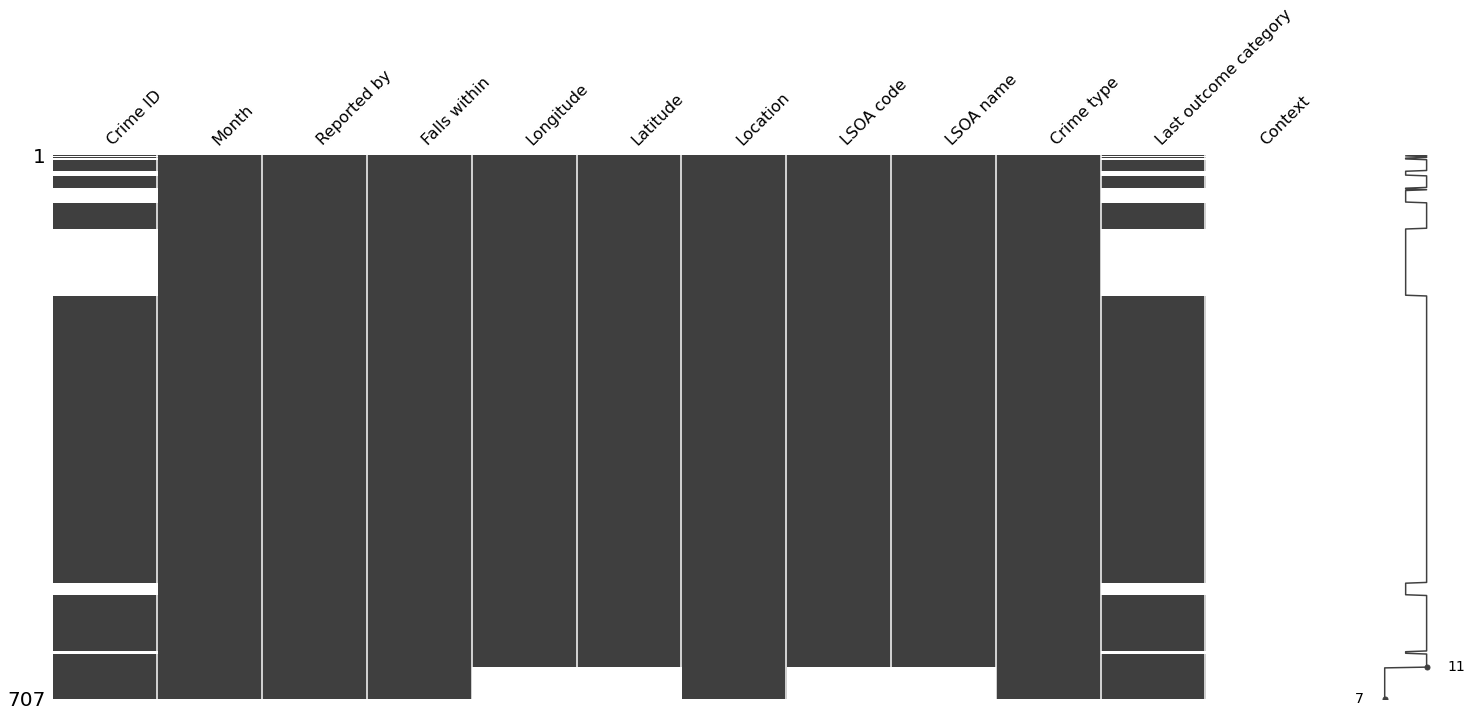

In [10]:
msno.matrix(data_2018)
plt.show()

Drop down the column fields that are not used for analysis to speed up the process

In [30]:
data_2018.drop(columns=['Crime ID','Context'],inplace=True)
data_2021.drop(columns=['Crime ID','Context'],inplace=True)

KeyError: "['Crime ID'] not found in axis"

In [12]:
data_2018.head()

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,2018-03,City of London Police,City of London Police,-0.106038,51.519873,On or near Nightclub,E01000916,Camden 027B,Violence and sexual offences,Status update unavailable,NaN
1,2018-03,City of London Police,City of London Police,-0.112422,51.515381,On or near Star Yard,E01000914,Camden 028B,Anti-social behaviour,NaN,NaN
2,2018-03,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Theft from the person,Investigation complete; no suspect identified,NaN
3,2018-03,City of London Police,City of London Police,-0.111962,51.518494,On or near Nightclub,E01000914,Camden 028B,Violence and sexual offences,Court result unavailable,NaN
4,2018-03,City of London Police,City of London Police,-0.097736,51.520206,On or near Conference/Exhibition Centre,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN


# **Analyse and Visualise the current status of crimes reported for bothe year seperately.**

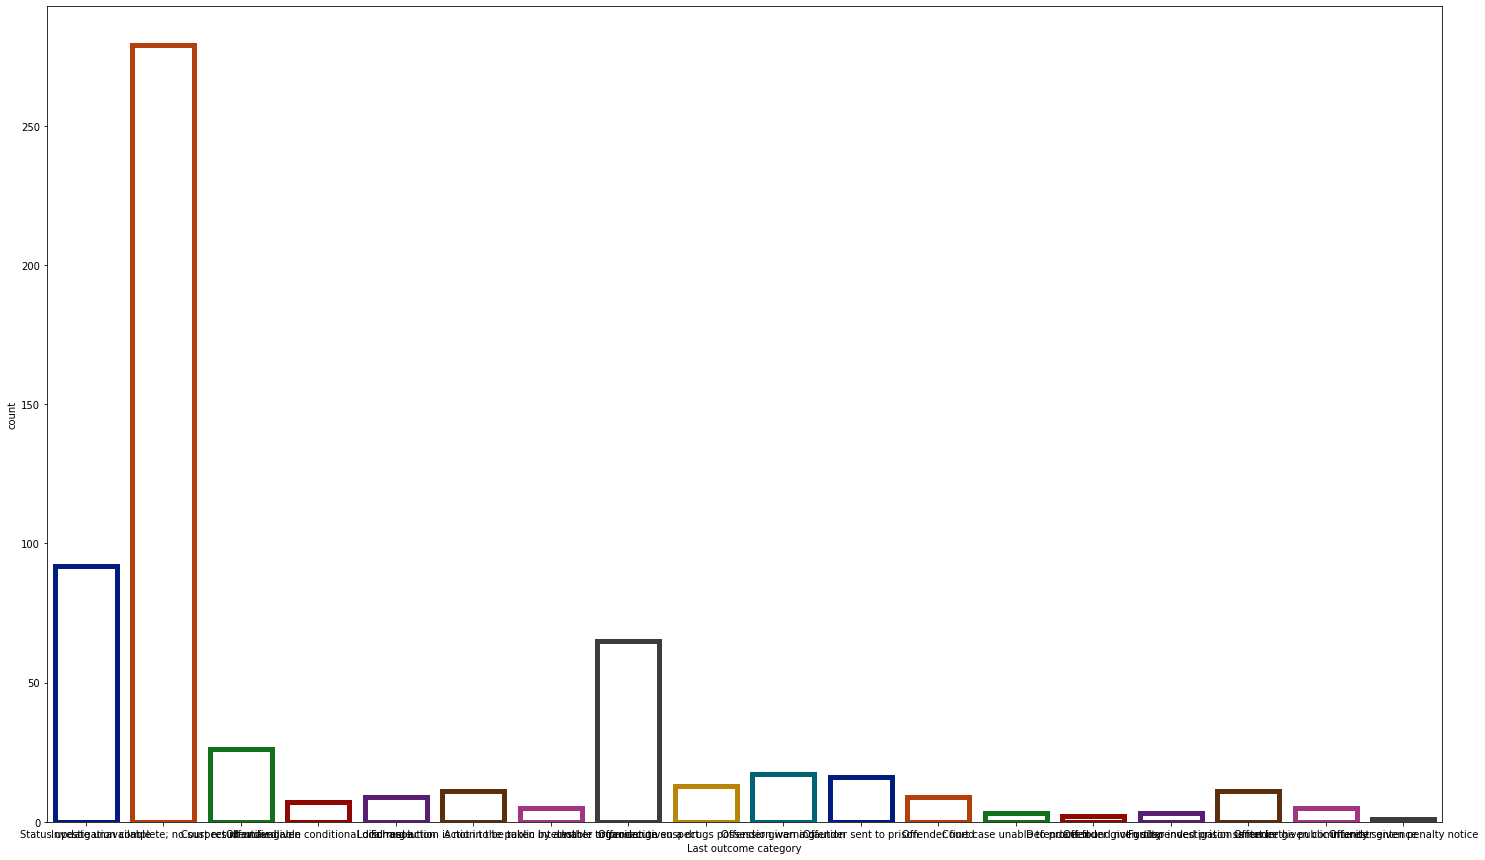

In [16]:
plt.figure(figsize=(25,15))
ax = sns.countplot(x="Last outcome category", data=data_2018,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

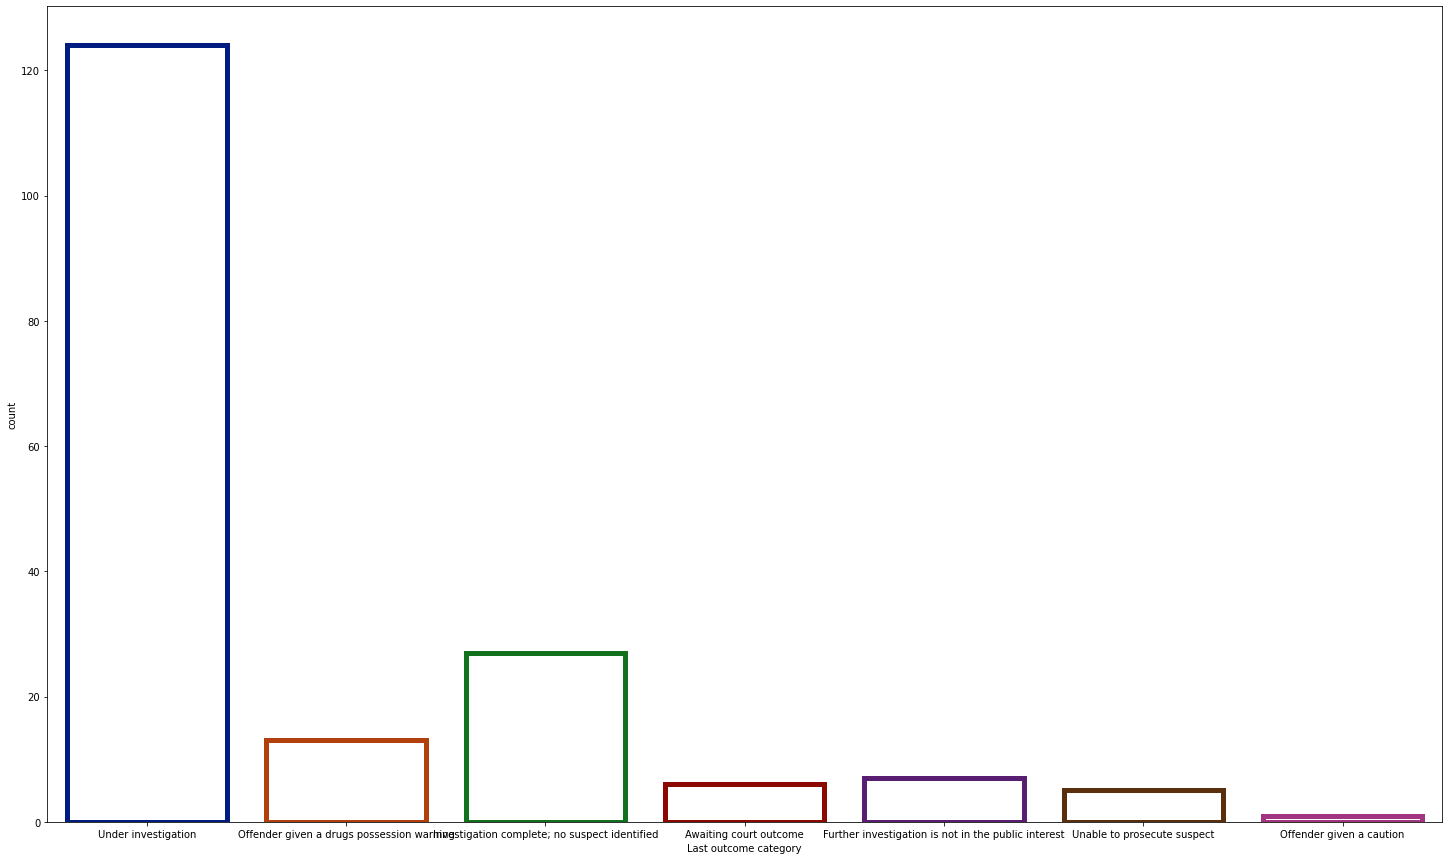

In [17]:
plt.figure(figsize=(25,15))
ax = sns.countplot(x="Last outcome category", data=data_2021,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

# **Analyse the crime category as reported and visualize the same.**

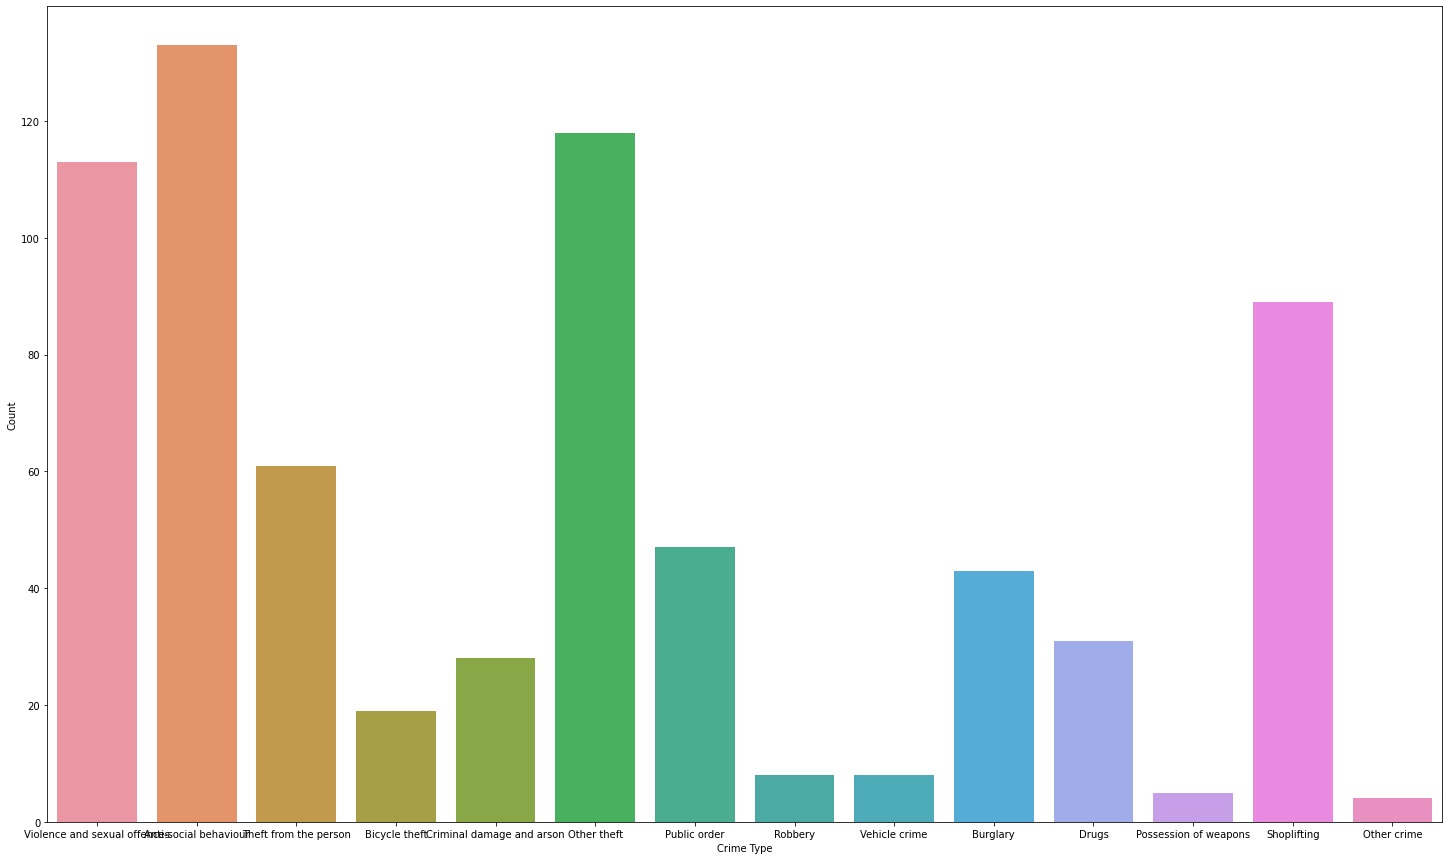

In [28]:
plt.figure(figsize=(25,15))
import seaborn
seaborn.countplot(x='Crime type', data=data_2018)
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.show()

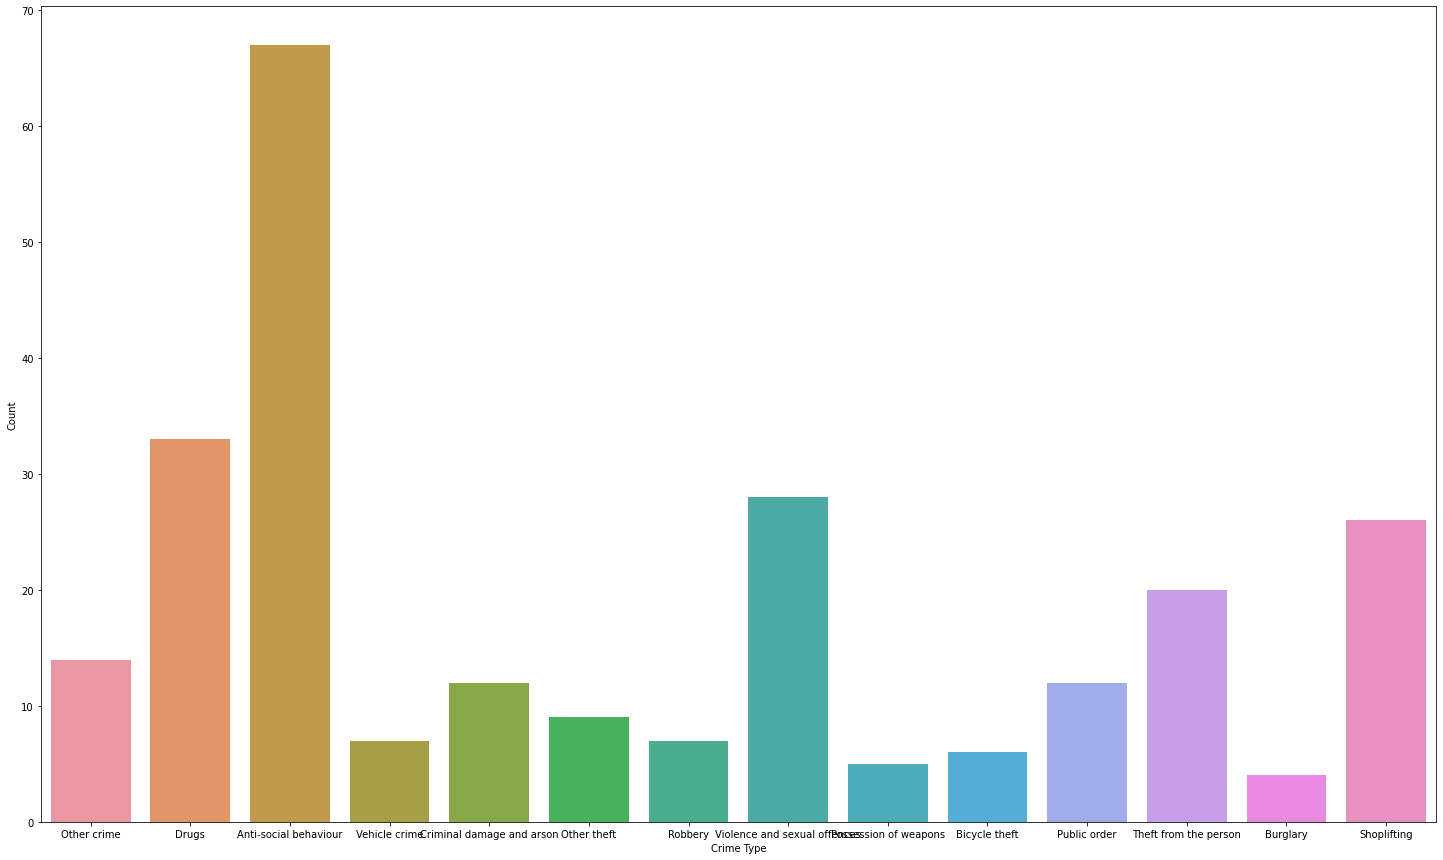

In [29]:

plt.figure(figsize=(25,15))
import seaborn
seaborn.countplot(x='Crime type', data=data_2021)
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.show()

Analyze and visualise the locations where crimes occur

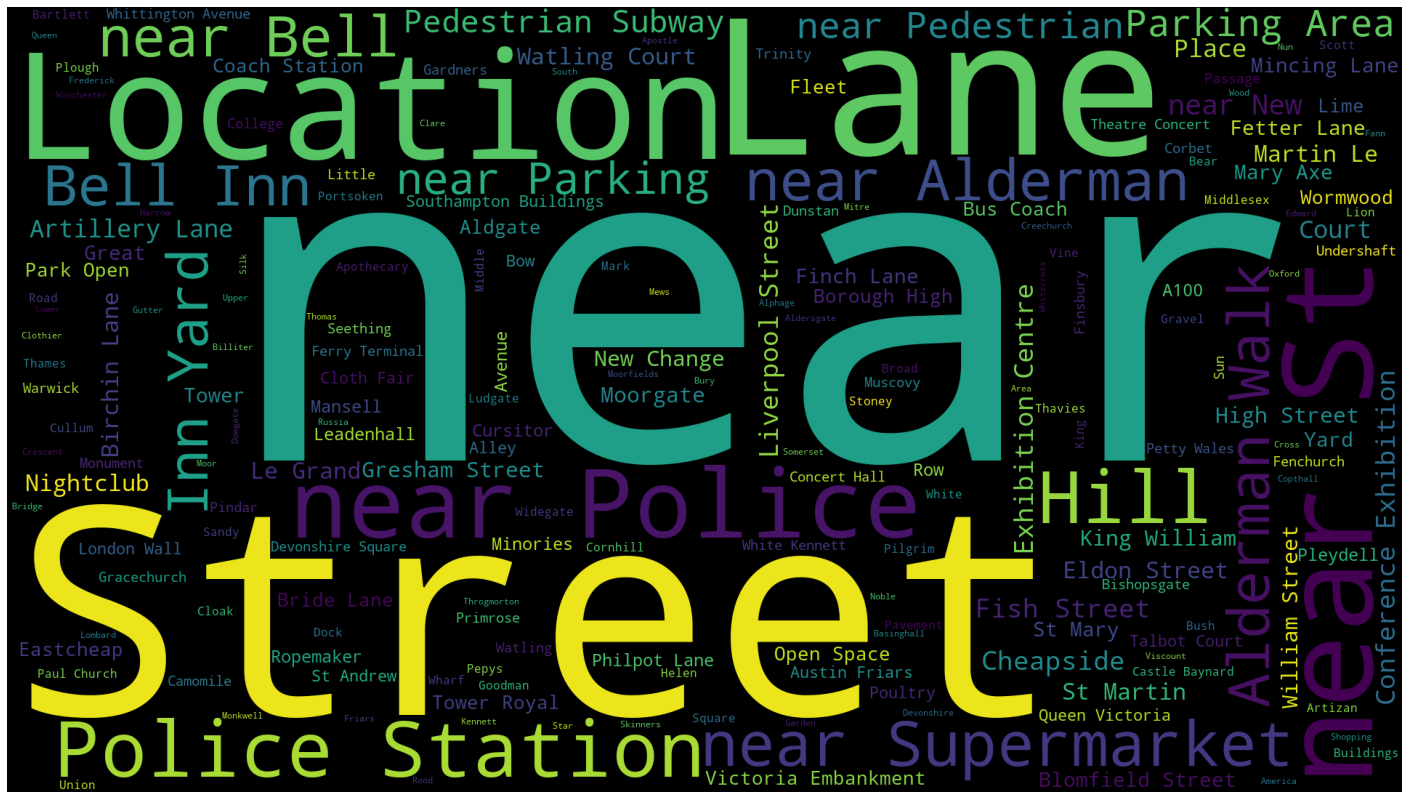

In [31]:
plt.figure(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data_2018.Location))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

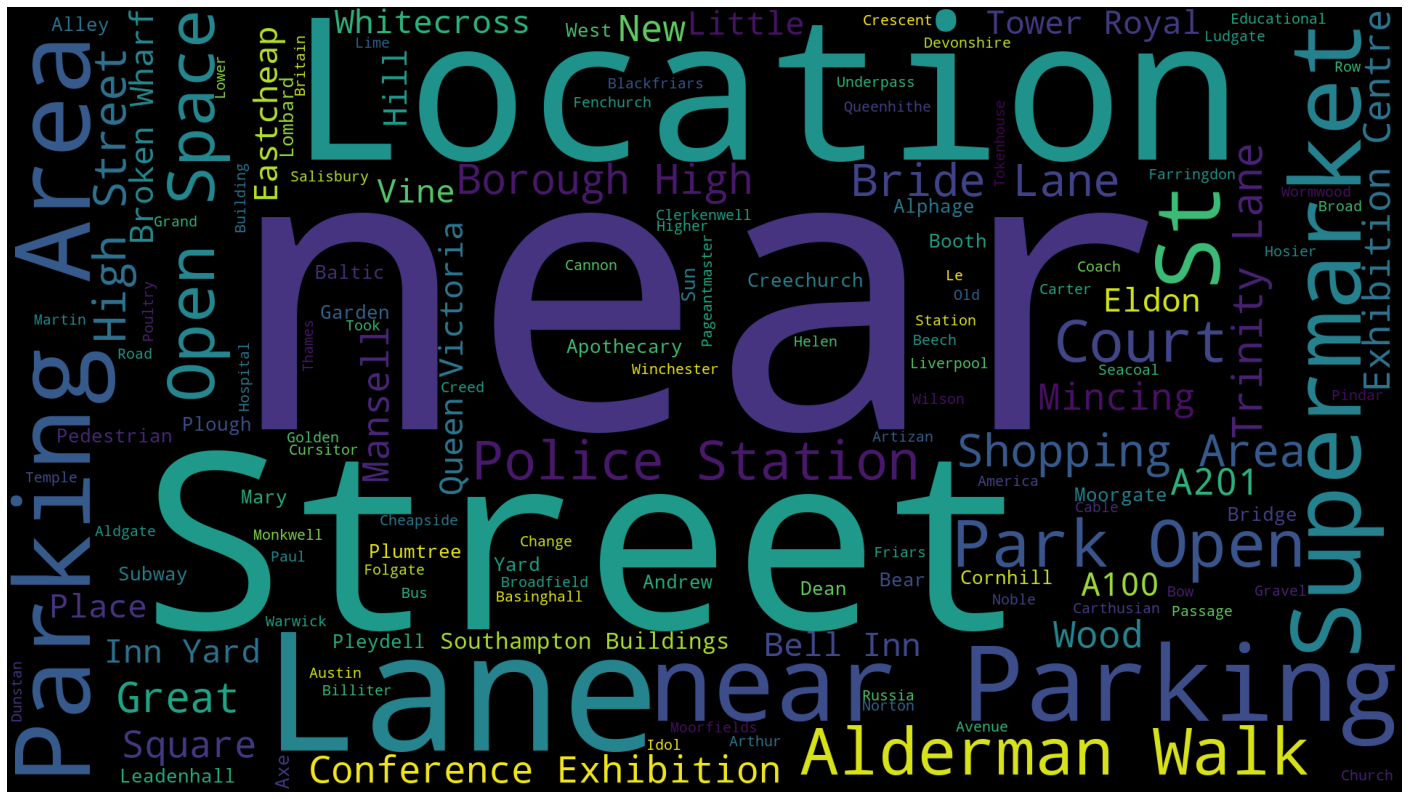

In [33]:
plt.figure(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data_2021.Location))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

# **Compare the crime ratio with respect to both year and visualise**

In [62]:
data_join4_crime=data_2018.append(data_2021)
data_join4_crime.drop(columns=['Reported by','Falls within', 'Longitude', 'Latitude','Location','LSOA name','LSOA code','Last outcome category'],inplace=True)
data_join4_crime.head()
data_join4_crime["Month"].value_counts()


2018-03    707
2021-02    250
Name: Month, dtype: int64

In [50]:
# reset_index() gives a column for counting, after groupby uses year and category
ctdf = (data_join4_crime.reset_index()
          .groupby(['Month','Crime type'], as_index=False)
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'ct'})
       )
print (ctdf)


      Month                    Crime type   ct  Context
0   2018-03         Anti-social behaviour  133        0
1   2018-03                 Bicycle theft   19        0
2   2018-03                      Burglary   43        0
3   2018-03     Criminal damage and arson   28        0
4   2018-03                         Drugs   31        0
5   2018-03                   Other crime    4        0
6   2018-03                   Other theft  118        0
7   2018-03         Possession of weapons    5        0
8   2018-03                  Public order   47        0
9   2018-03                       Robbery    8        0
10  2018-03                   Shoplifting   89        0
11  2018-03         Theft from the person   61        0
12  2018-03                 Vehicle crime    8        0
13  2018-03  Violence and sexual offences  113        0
14  2021-02         Anti-social behaviour   67        0
15  2021-02                 Bicycle theft    6        0
16  2021-02                      Burglary    4  

<Figure size 1800x1080 with 0 Axes>

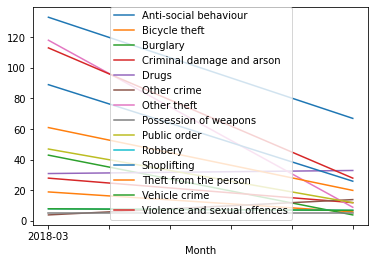

In [67]:
plt.figure(figsize=(25,15))
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in ctdf.groupby('Crime type'):
    data.plot(x='Month', y='ct', ax=ax, label=key)

# **Compare and visualise the current status for both year.**

In [63]:
data_join4_status=data_2018.append(data_2021)
data_join4_status.drop(columns=['Reported by','Falls within', 'Longitude', 'Latitude','Location','LSOA name','LSOA code','Crime type'],inplace=True)
data_join4_status.head()
data_join4_status["Month"].value_counts()

2018-03    707
2021-02    250
Name: Month, dtype: int64

In [64]:
# reset_index() gives a column for counting, after groupby uses year and category
ctdf2 = (data_join4_status.reset_index()
          .groupby(['Month','Last outcome category'], as_index=False)
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'ct'})
       )
print (ctdf2)

      Month                              Last outcome category   ct  Context
0   2018-03         Action to be taken by another organisation    5        0
1   2018-03                       Court case unable to proceed    3        0
2   2018-03                           Court result unavailable   26        0
3   2018-03                         Defendant found not guilty    2        0
4   2018-03        Formal action is not in the public interest   11        0
5   2018-03  Further investigation is not in the public int...   11        0
6   2018-03      Investigation complete; no suspect identified  279        0
7   2018-03                                   Local resolution    9        0
8   2018-03                                     Offender fined    9        0
9   2018-03                           Offender given a caution   17        0
10  2018-03          Offender given a drugs possession warning   13        0
11  2018-03                  Offender given community sentence    5        0

<Figure size 720x1440 with 0 Axes>

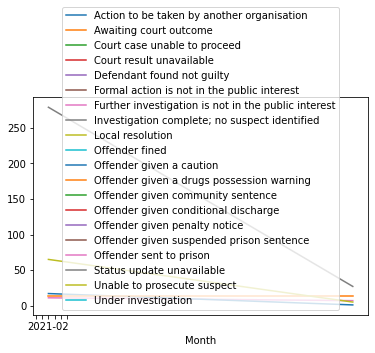

In [73]:
#plt.figure(figsize=(10,20))
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in ctdf2.groupby('Last outcome category'):
    data.plot(x='Month', y='ct', ax=ax, label=key)